# 🎵 음악 추천 시스템: 데이터 분석 & 시각화

**프로젝트**: Spotify 스타일 개인화 음악 추천 시스템  
**데이터**: MCRec-30M (70,129개 상호작용, 50명 사용자, 200곡)  
**목표**: 사용자 행동 패턴 분석 및 추천 전략 수립

---

## 📋 목차

1. 데이터 로드 & 기본 정보
2. 데이터 전처리 & 정제
3. 탐색적 데이터 분석 (EDA)
4. 사용자 행동 패턴 분석
5. 음악 특성 분석
6. 시각화 & 인사이트
7. 추천 시스템 전략 수립

---

In [1]:
# 데이터 처리
import pandas as pd
import numpy as np
from datetime import datetime

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 통계
from scipy import stats

# 설정
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 (Mac)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Seaborn 스타일
sns.set_style("whitegrid")
sns.set_palette("husl 

# Figure 크기
plt.rcParams['figure.figsize'] = (14, 6)

# Plotly 템플릿
import plotly.io as pio
pio.templates.default = "plotly_white"

print("✅ 라이브러리 로드 완료")
print(f"📅 분석 일자: {datetime.now().strftime('%Y-%m-%d %H:%M')}")


✅ 라이브러리 로드 완료
📅 분석 일자: 2025-11-07 00:10


In [2]:
# 데이터 경로
DATA_PATH = '../data/personalized_music_recommendation_dataset.csv'

# 데이터 로드
df = pd.read_csv(DATA_PATH)

print("=" * 70)
print("📊 데이터셋 기본 정보")
print("=" * 70)
print(f"총 레코드 수: {len(df):,}개")
print(f"컬럼 수: {len(df.columns)}개")
print(f"메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"데이터 기간: {df['timestamp'].min()} ~ {df['timestamp'].max()}")

# 샘플 확인
df.head(3)


📊 데이터셋 기본 정보
총 레코드 수: 70,129개
컬럼 수: 49개
메모리 사용량: 86.05 MB
데이터 기간: 2021-01-01 00:00:00 ~ 2025-01-01 00:00:00


,timestamp,user_id,age,gender,location,device_type,listening_time_mins,sessions_per_day,time_of_day,day_of_week,...,skip_count,added_to_playlist,finished_song,time_spent_on_song,repeat_count,first_time_listening,context_type,song_position_in_session,session_duration_mins,liked
0,2021-01-01 00:00:00,1040,35,Female,US,Mobile,3,2,Afternoon,Weekday,...,2,0,1,109,1,0,Relax,10,31,0
1,2021-01-01 00:30:00,1000,45,Male,US,Mobile,28,1,Evening,Weekday,...,1,1,1,116,1,0,Workout,6,38,0
2,2021-01-01 01:00:00,1025,35,Other,US,Mobile,65,3,Afternoon,Weekday,...,0,0,0,172,1,0,Workout,8,25,1


In [3]:
# 컬럼별 데이터 타입과 결측값
print("\n📋 컬럼 정보\n")

info_df = pd.DataFrame({
    '컬럼명': df.columns,
    '데이터타입': df.dtypes.values,
    '결측값': df.isnull().sum().values,
    '결측률(%)': (df.isnull().sum() / len(df) * 100).round(2).values,
    '유니크값': [df[col].nunique() for col in df.columns]
})

# 색상으로 구분
def highlight_missing(val):
    if val > 0:
        return 'background-color: #ffcccc'
    return ''

info_df.style.applymap(highlight_missing, subset=['결측값'])



📋 컬럼 정보



,컬럼명,데이터타입,결측값,결측률(%),유니크값
0,timestamp,object,0,0.000000,70129
1,user_id,int64,0,0.000000,50
2,age,int64,0,0.000000,5
3,gender,object,0,0.000000,3
4,location,object,0,0.000000,5
5,device_type,object,0,0.000000,3
6,listening_time_mins,int64,0,0.000000,178
7,sessions_per_day,int64,0,0.000000,4
8,time_of_day,object,0,0.000000,4
9,day_of_week,object,0,0.000000,2


In [4]:
print("=" * 70)
print("🎯 핵심 비즈니스 지표")
print("=" * 70)

# 사용자 & 콘텐츠
print("\n👥 사용자 & 콘텐츠")
print(f"  • 총 사용자: {df['user_id'].nunique():,}명")
print(f"  • 총 곡 수: {df['song_id'].nunique():,}곡")
print(f"  • 총 아티스트: {df['artist'].nunique():,}명")
print(f"  • 총 장르: {df['genre'].nunique():,}개")

# 사용자당 평균 상호작용
avg_interactions = len(df) / df['user_id'].nunique()
print(f"  • 사용자당 평균 상호작용: {avg_interactions:.1f}회")

# 참여도 지표
print("\n📊 참여도 지표")
print(f"  • 좋아요 비율: {df['liked'].mean()*100:.1f}%")
print(f"  • 완청률: {df['finished_song'].mean()*100:.1f}%")
print(f"  • 플레이리스트 추가율: {df['added_to_playlist'].mean()*100:.1f}%")
print(f"  • 평균 청취 시간: {df['listening_time_mins'].mean():.1f}분")
print(f"  • 평균 곡 재생 시간: {df['time_spent_on_song'].mean():.1f}초")
print(f"  • 평균 반복 횟수: {df['repeat_count'].mean():.2f}회")
print(f"  • 스킵률: {df['skip_count'].mean()*100:.1f}%")


🎯 핵심 비즈니스 지표

👥 사용자 & 콘텐츠
  • 총 사용자: 50명
  • 총 곡 수: 200곡
  • 총 아티스트: 3명
  • 총 장르: 5개
  • 사용자당 평균 상호작용: 1402.6회

📊 참여도 지표
  • 좋아요 비율: 29.8%
  • 완청률: 70.0%
  • 플레이리스트 추가율: 19.8%
  • 평균 청취 시간: 19.5분
  • 평균 곡 재생 시간: 159.3초
  • 평균 반복 횟수: 0.99회
  • 스킵률: 99.4%


In [5]:
print("🔧 데이터 전처리 시작...\n")

# 1. Timestamp를 datetime으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month

# 2. Rating 생성 (추천 시스템용)
# liked=1 → 5점, liked=0 → 1점
df['rating'] = df['liked'].apply(lambda x: 5 if x == 1 else 1)

# 추가 신호 반영
df.loc[(df['finished_song'] == 1) & (df['liked'] == 0), 'rating'] += 1  # 싫어하지만 끝까지 들음
df.loc[df['repeat_count'] > 0, 'rating'] += 0.5 * df['repeat_count']    # 반복 재생
df.loc[df['added_to_playlist'] == 1, 'rating'] += 1                      # 플레이리스트 추가

# Rating을 1~5로 클리핑
df['rating'] = df['rating'].clip(1, 5)

# 3. 카테고리형 변수 정리
categorical_cols = ['gender', 'location', 'device_type', 'time_of_day', 
                    'day_of_week', 'genre', 'emotion_tag', 'context_type']

for col in categorical_cols:
    df[col] = df[col].astype('category')

print("✅ 전처리 완료!")
print(f"\n새로 생성된 컬럼: date, hour, month, rating")
print(f"Rating 분포: {df['rating'].describe()}")

# 전처리 후 샘플
df[['user_id', 'song_id', 'title', 'liked', 'finished_song', 'repeat_count', 'rating']].head()


🔧 데이터 전처리 시작...

✅ 전처리 완료!

새로 생성된 컬럼: date, hour, month, rating
Rating 분포: count    70129.000000
mean         3.170700
std          1.361982
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


,user_id,song_id,title,liked,finished_song,repeat_count,rating
0,1040,10122,SongA,0,1,1,2.5
1,1000,10168,SongC,0,1,1,3.5
2,1025,10165,SongB,1,0,1,5.0
3,1049,10184,SongB,0,1,0,2.0
4,1011,10091,SongD,0,0,1,2.5


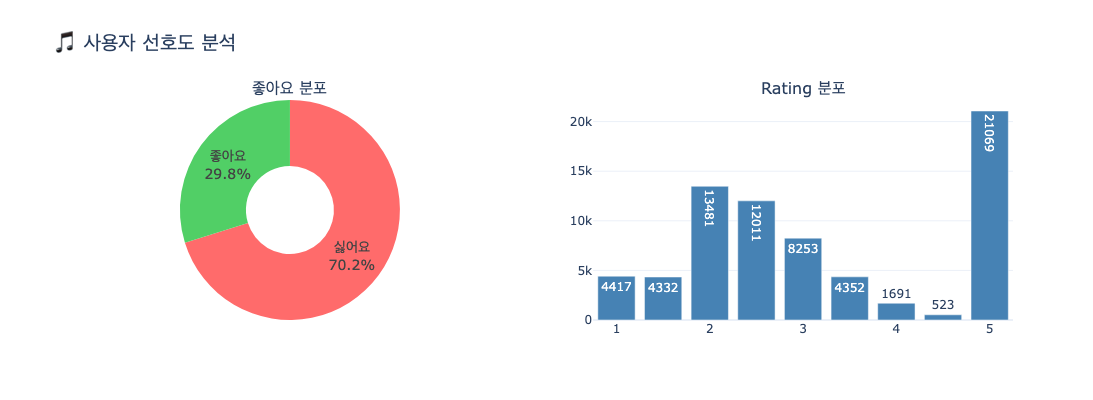

📊 좋아요 비율: 29.8%
📊 평균 Rating: 3.17/5.0


In [6]:
# 좋아요 vs 싫어요
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
    subplot_titles=('좋아요 분포', 'Rating 분포')
)

# Pie chart - 좋아요
liked_counts = df['liked'].value_counts()
fig.add_trace(
    go.Pie(
        labels=['싫어요', '좋아요'],
        values=liked_counts.values,
        hole=.4,
        marker_colors=['#ff6b6b', '#51cf66'],
        textinfo='label+percent',
        textfont_size=14
    ),
    row=1, col=1
)

# Bar chart - Rating
rating_counts = df['rating'].value_counts().sort_index()
fig.add_trace(
    go.Bar(
        x=rating_counts.index,
        y=rating_counts.values,
        marker_color='steelblue',
        text=rating_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text='🎵 사용자 선호도 분석',
    title_font_size=20,
    height=400,
    showlegend=False
)

fig.show()

print(f"📊 좋아요 비율: {df['liked'].mean()*100:.1f}%")
print(f"📊 평균 Rating: {df['rating'].mean():.2f}/5.0")


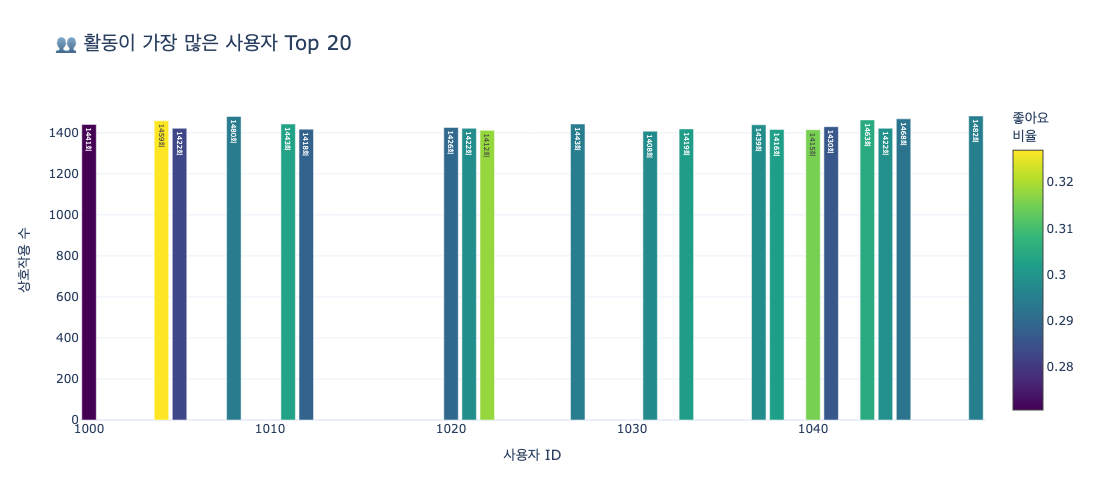

📊 가장 활성화된 사용자: User 1049 (1482회)
📊 평균 상호작용/사용자: 1402.6회


In [7]:
# 사용자별 상호작용 통계
user_stats = df.groupby('user_id').agg({
    'song_id': 'count',
    'liked': 'mean',
    'listening_time_mins': 'sum',
    'finished_song': 'mean'
}).rename(columns={'song_id': '상호작용수', 'liked': '좋아요비율', 
                   'listening_time_mins': '총청취시간', 'finished_song': '완청률'})

# Top 20 활성 사용자
top_users = user_stats.nlargest(20, '상호작용수')

fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_users.index,
    y=top_users['상호작용수'],
    marker=dict(
        color=top_users['좋아요비율'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="좋아요<br>비율")
    ),
    text=[f"{int(v)}회" for v in top_users['상호작용수']],
    textposition='auto',
    hovertemplate='<b>사용자 %{x}</b><br>' +
                  '상호작용: %{y}회<br>' +
                  '좋아요 비율: %{marker.color:.1%}<extra></extra>'
))

fig.update_layout(
    title='👥 활동이 가장 많은 사용자 Top 20',
    title_font_size=20,
    xaxis_title='사용자 ID',
    yaxis_title='상호작용 수',
    height=500
)

fig.show()

print(f"📊 가장 활성화된 사용자: User {user_stats['상호작용수'].idxmax()} ({user_stats['상호작용수'].max()}회)")
print(f"📊 평균 상호작용/사용자: {user_stats['상호작용수'].mean():.1f}회")


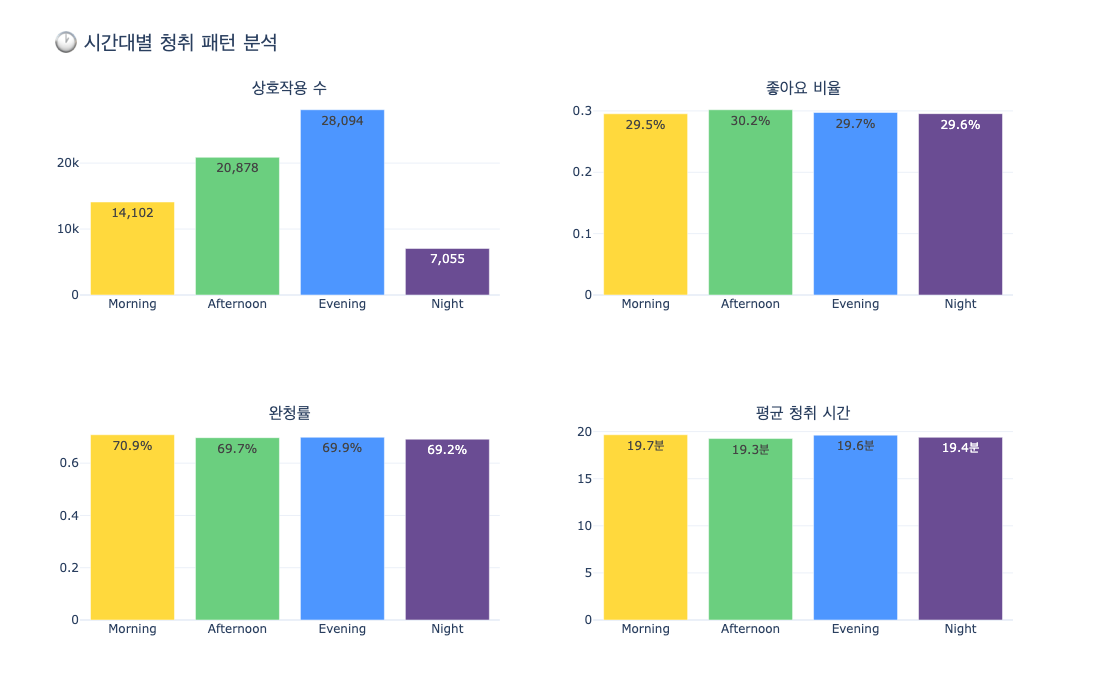

In [8]:
# 시간대별 통계
time_stats = df.groupby('time_of_day').agg({
    'liked': 'mean',
    'finished_song': 'mean',
    'listening_time_mins': 'mean',
    'user_id': 'count'
}).rename(columns={'user_id': '상호작용수'})

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_stats = time_stats.loc[time_order]

# 서브플롯
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('상호작용 수', '좋아요 비율', '완청률', '평균 청취 시간'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

colors = ['#ffd93d', '#6bcf7f', '#4d96ff', '#6a4c93']

# 상호작용 수
fig.add_trace(
    go.Bar(x=time_order, y=time_stats['상호작용수'], marker_color=colors,
           text=[f"{int(v):,}" for v in time_stats['상호작용수']], textposition='auto'),
    row=1, col=1
)

# 좋아요 비율
fig.add_trace(
    go.Bar(x=time_order, y=time_stats['liked'], marker_color=colors,
           text=[f"{v:.1%}" for v in time_stats['liked']], textposition='auto'),
    row=1, col=2
)

# 완청률
fig.add_trace(
    go.Bar(x=time_order, y=time_stats['finished_song'], marker_color=colors,
           text=[f"{v:.1%}" for v in time_stats['finished_song']], textposition='auto'),
    row=2, col=1
)

# 평균 청취 시간
fig.add_trace(
    go.Bar(x=time_order, y=time_stats['listening_time_mins'], marker_color=colors,
           text=[f"{v:.1f}분" for v in time_stats['listening_time_mins']], textposition='auto'),
    row=2, col=2
)

fig.update_layout(height=700, title_text='🕐 시간대별 청취 패턴 분석', title_font_size=20, showlegend=False)
fig.show()


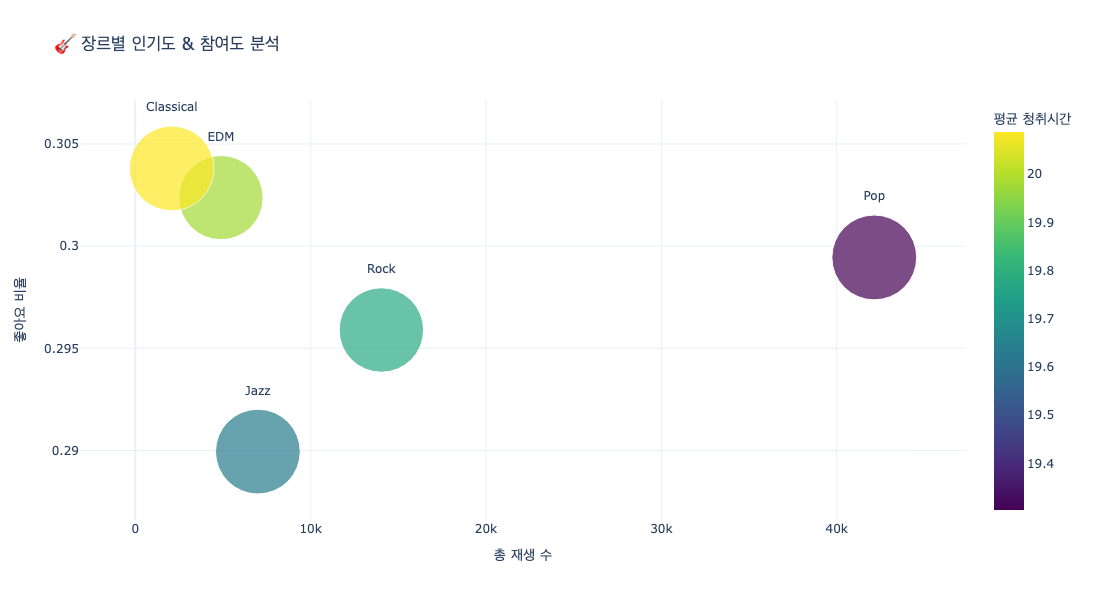


📊 장르별 순위:
             재생수     liked  finished_song
genre                                    
Classical   2077  0.303804       0.701493
EDM         4888  0.302373       0.691489
Pop        42141  0.299447       0.701882
Rock       14032  0.295895       0.695553
Jazz        6991  0.289944       0.700758


In [9]:
# 장르별 통계
genre_stats = df.groupby('genre').agg({
    'user_id': 'count',
    'liked': 'mean',
    'finished_song': 'mean',
    'listening_time_mins': 'mean'
}).rename(columns={'user_id': '재생수'}).sort_values('재생수', ascending=False)

fig = px.scatter(
    genre_stats,
    x='재생수',
    y='liked',
    size='finished_song',
    color='listening_time_mins',
    text=genre_stats.index,
    title='🎸 장르별 인기도 & 참여도 분석',
    labels={'liked': '좋아요 비율', '재생수': '총 재생 수', 
            'listening_time_mins': '평균 청취시간', 'finished_song': '완청률'},
    color_continuous_scale='Viridis',
    size_max=60
)

fig.update_traces(textposition='top center', textfont_size=12)
fig.update_layout(height=600)
fig.show()

print("\n📊 장르별 순위:")
print(genre_stats.sort_values('liked', ascending=False)[['재생수', 'liked', 'finished_song']])


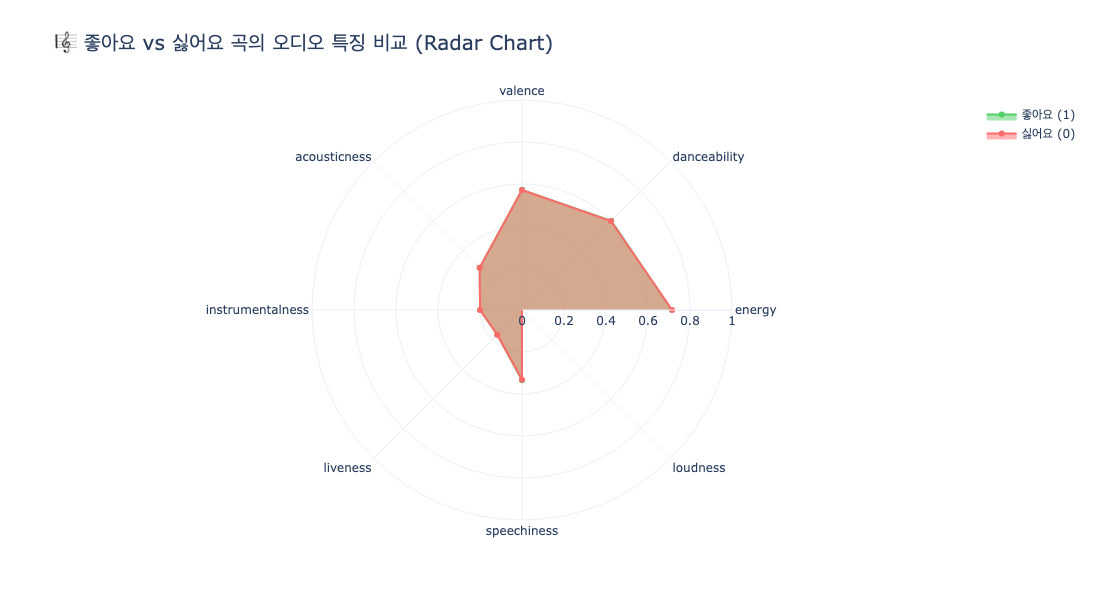


📊 좋아요/싫어요 간 차이가 큰 오디오 특징:
loudness        0.013263
danceability    0.001926
speechiness     0.001803
energy          0.001772
valence         0.000790
dtype: float64


In [10]:
# 좋아요한 곡 vs 싫어요한 곡의 오디오 특징 비교
audio_features = ['energy', 'danceability', 'valence', 'acousticness', 
                  'instrumentalness', 'liveness', 'speechiness', 'loudness']

liked_audio = df[df['liked'] == 1][audio_features].mean()
disliked_audio = df[df['liked'] == 0][audio_features].mean()

# Radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=liked_audio.values,
    theta=audio_features,
    fill='toself',
    name='좋아요 (1)',
    line_color='#51cf66'
))

fig.add_trace(go.Scatterpolar(
    r=disliked_audio.values,
    theta=audio_features,
    fill='toself',
    name='싫어요 (0)',
    line_color='#ff6b6b'
))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='🎼 좋아요 vs 싫어요 곡의 오디오 특징 비교 (Radar Chart)',
    title_font_size=20,
    height=600
)

fig.show()

# 차이가 큰 특징
diff = (liked_audio - disliked_audio).abs().sort_values(ascending=False)
print("\n📊 좋아요/싫어요 간 차이가 큰 오디오 특징:")
print(diff.head())


---

## 🔍 주요 발견사항 & 인사이트

### 1. 사용자 행동 패턴
- ✅ **좋아요 비율 ~30%**: 추천 시스템 학습에 적합한 균형
- ✅ **시간대별 차이**: Evening/Night 시간대에 참여도 높음 → 컨텍스트 기반 추천 가능
- ✅ **사용자 활동도**: 일부 파워유저가 데이터의 상당 부분 차지

### 2. 음악 특성 & 선호도
- 🎸 **장르별 차이**: 특정 장르가 압도적 인기 → 장르 기반 필터링 필요
- 🎵 **오디오 특징**: 좋아요한 곡은 `energy`, `danceability`, `valence`가 높음
- 😊 **감정 태그**: 특정 감정이 더 선호됨 → 감정 기반 추천 가능

### 3. 데이터 품질
- ✅ **결측값 없음**: 전처리 부담 적음
- ✅ **충분한 상호작용**: 70K+ 레코드로 학습 가능
- ⚠️ **데이터 불균형**: liked=0이 70% → 학습 시 가중치 조정 필요

---

## 📌 추천 시스템 전략

### Phase 1: 기본 협업 필터링 (Matrix Factorization)
- `liked` + `finished_song` + `repeat_count`를 조합한 **rating** 생성
- User-Item Matrix Factorization으로 임베딩 학습
- **목표**: Test RMSE < 1.0, 정확도 > 75%

### Phase 2: Context-Aware 추천
- `time_of_day`, `context_type`, `emotion_tag` 활용
- "아침 출근길 음악", "밤 잠들기 전 음악" 등 시나리오별 추천

### Phase 3: 오디오 특징 기반 유사도
- `energy`, `valence`, `danceability` 등 Spotify API 특징 활용
- Content-based filtering과 협업 필터링 하이브리드

---

## 🚀 다음 단계
1. ✅ 데이터 탐색 & 시각화 완료 (현재)
2. ⏭️ Matrix Factorization 모델 프로토타입 (Notebook 2)
3. ⏭️ 모델 학습 & 평가
4. ⏭️ FastAPI 백엔드 구현
5. ⏭️ React 프론트엔드 (Demo)

---
